# ABOUT PROJECT : SOCIAL MEDIA GROUPING  
GIVEN A DATASET ON SOCIAL MEDIA ACTIVITY BY USERS ,OUR TASK IS TO PLACE THEM IN CLUSTERS BASED ON WHAT THEY LIKE OR THE NUMBER 
OF REACTIONS A CERTAIN VIDEO HAS AND THEN GROUPING THEM TOGETHER TO FORM A BUSINESS MODEL

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("C:\\Users\\EDGAR MUYALE DAVIES\\Downloads\\Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [6]:
df.drop(['status_id'],axis=1).describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# DATA ANALYSIS EXPLORATION

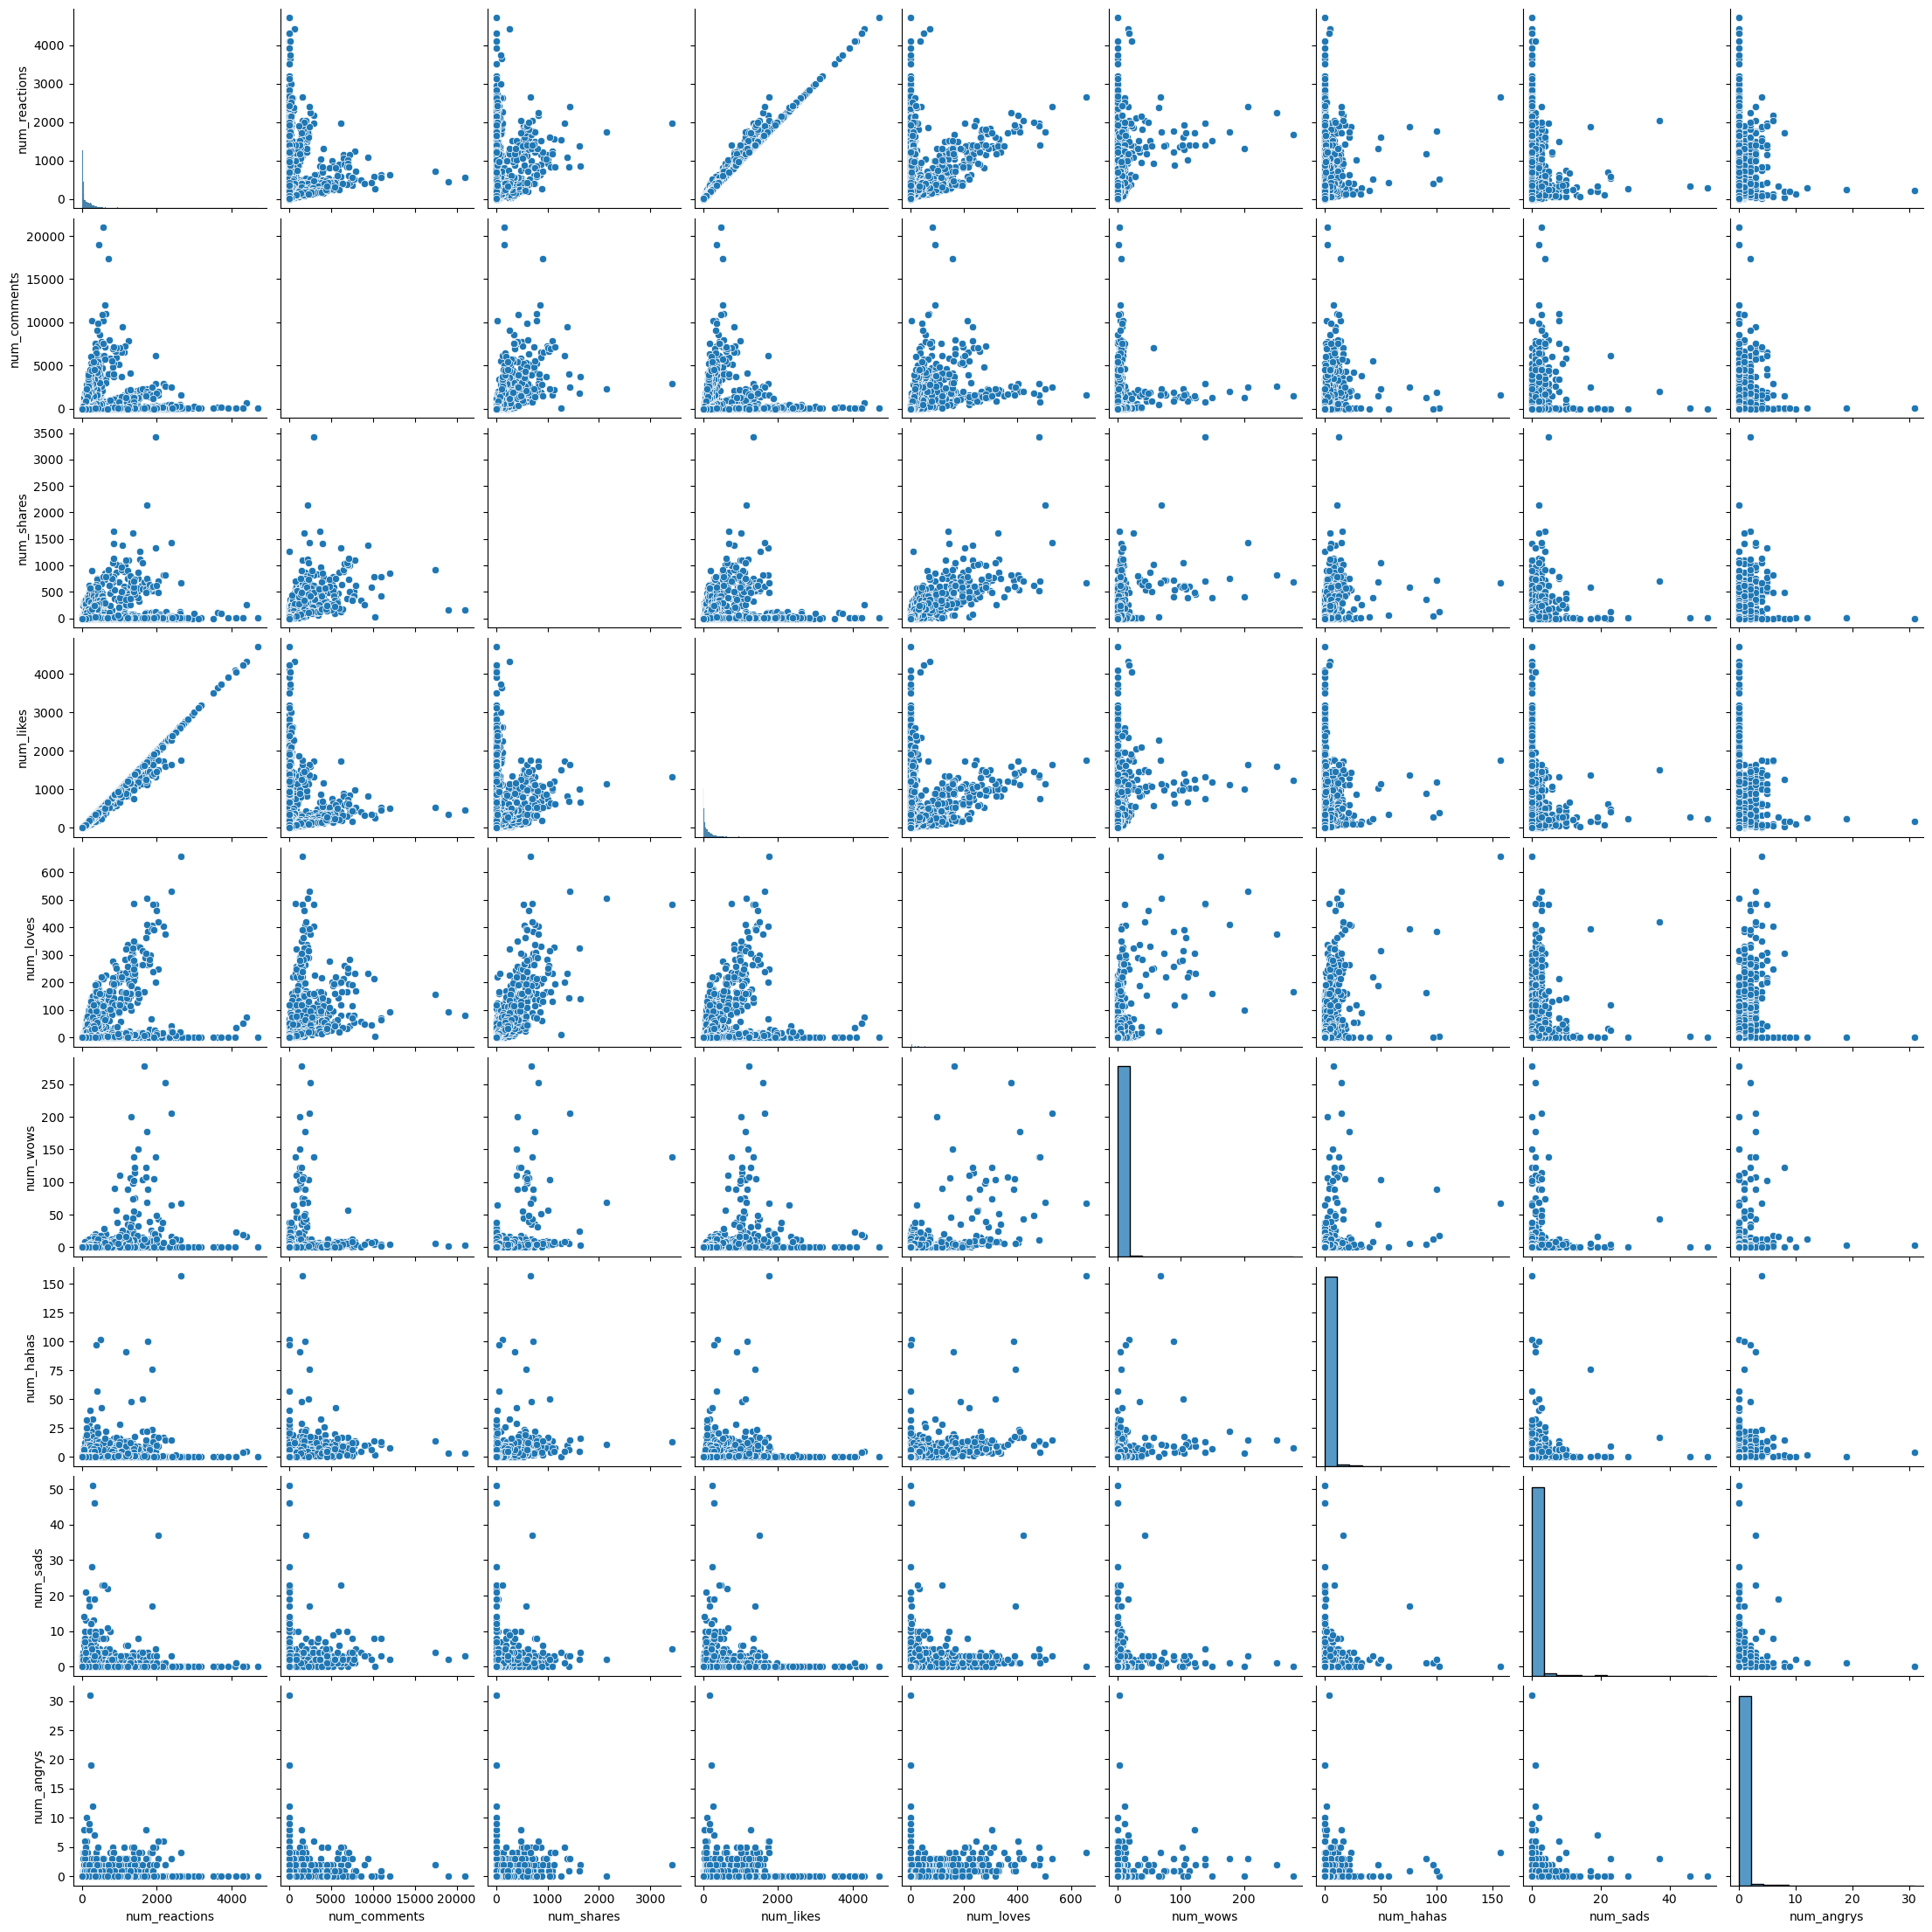

In [7]:
sns.pairplot(df.drop(['status_id'],axis=1))

In [8]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

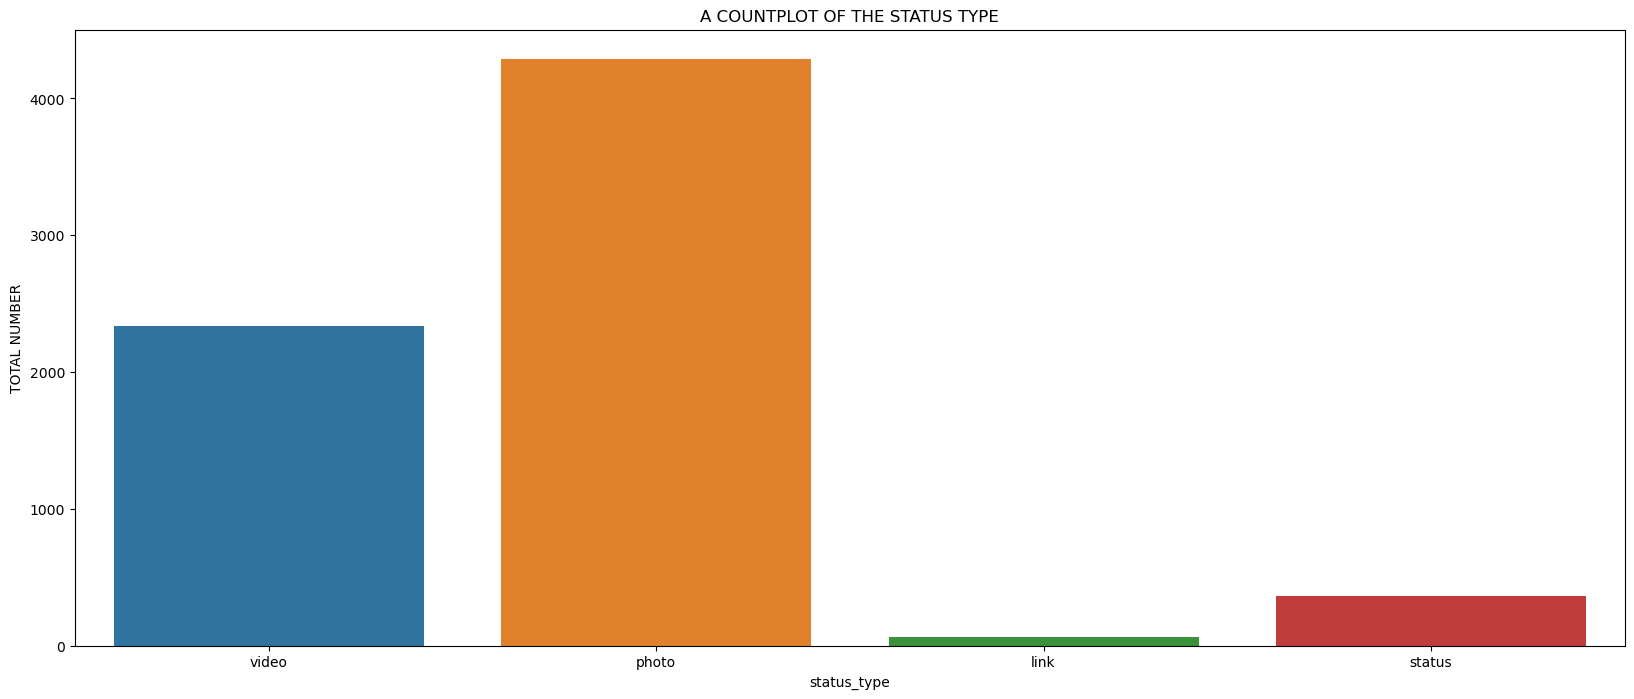

In [9]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x='status_type',data=df)
plt.ylabel("TOTAL NUMBER")
plt.title("A COUNTPLOT OF THE STATUS TYPE")
plt.show() # A majority of our statuses are photos,followed by video

In [10]:
# Which one of the statuses has the most reaction
def most_of_(column,hue='status_type',data=df):
    """This function returns the most of each column or condition for example if 
    one wants to get the most of the reactions or comment ,the column under study will be the reaction or column
    Args :
    column _ This is the column that we are investigating
    dataframe(DataFrame)_ This is the parent dataframe that house the column under study
    hue - This is the status type whether its a video or a link or mostly a photo
    Returns :
         A plotted histogram with the underlying hue and column as a result
    """
    fig = plt.figure(figsize=(20,8))
    sns.histplot(x=column,hue=hue,data=data)
    plt.ylabel("Total Count")
    plt.xlabel(column)
    plt.title(f"Most of {column}")
    plt.show()

In [11]:
metadata_columns = df.drop(['status_id','status_type','status_published'],axis=1)
metadata_columns

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


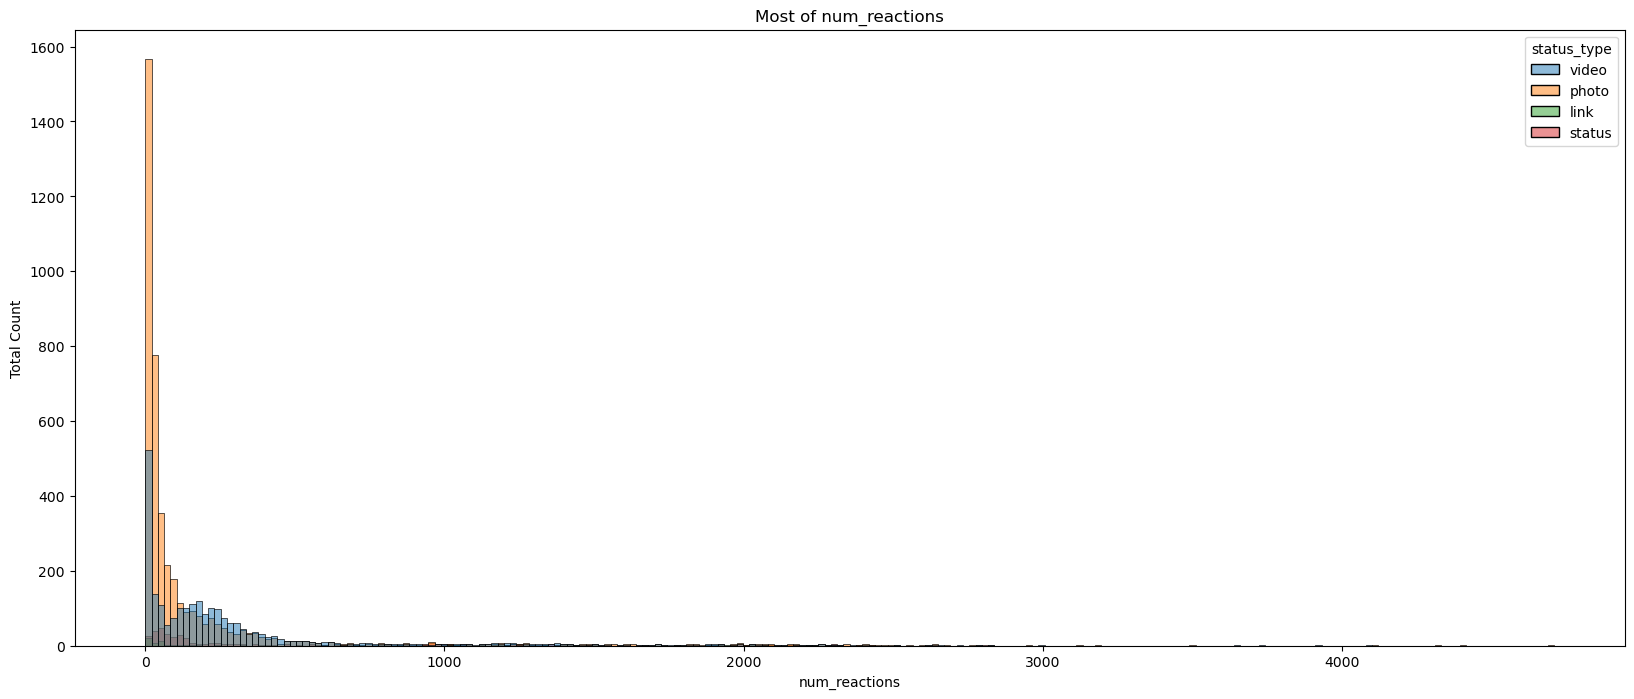

In [12]:
most_of_("num_reactions") # Photos have the most reactions 

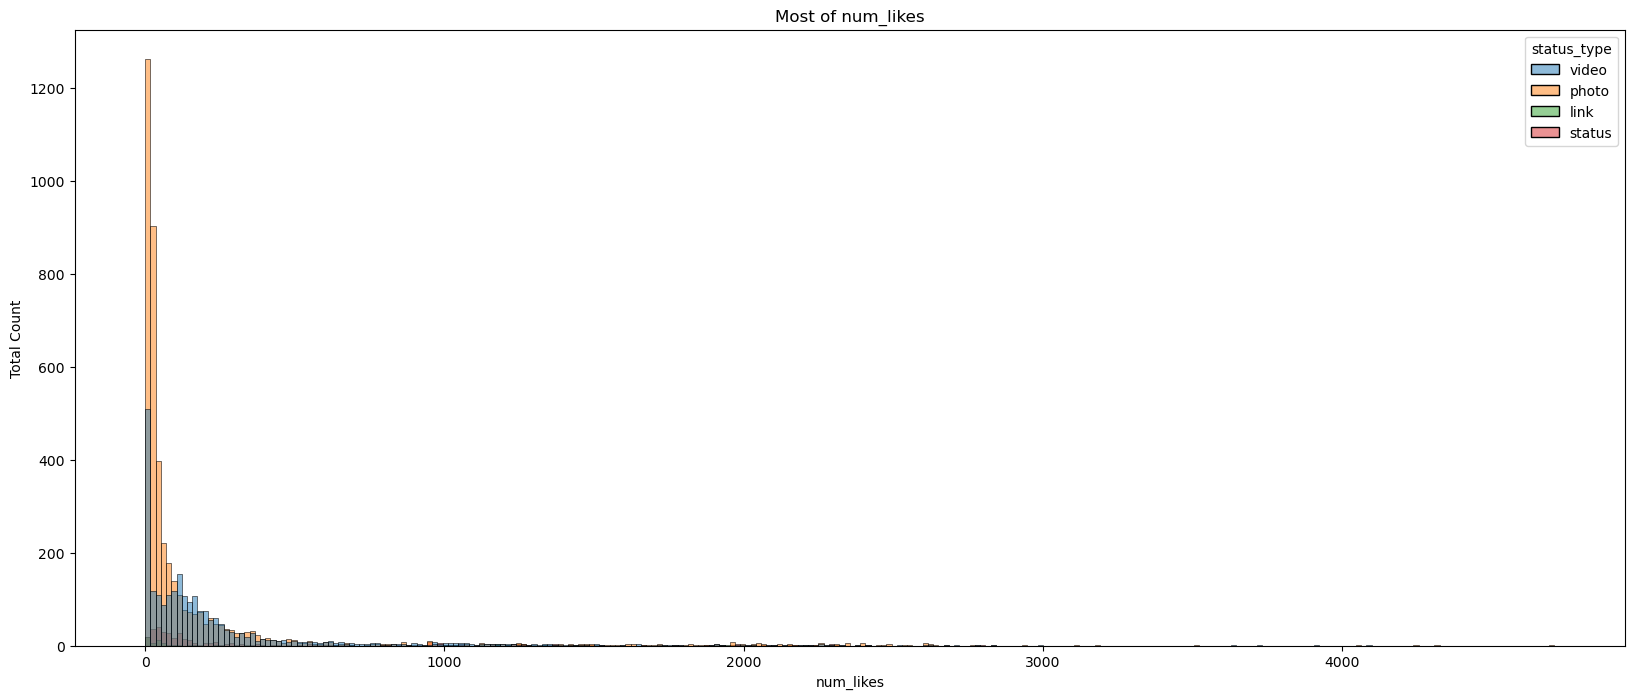

In [13]:
most_of_("num_likes")

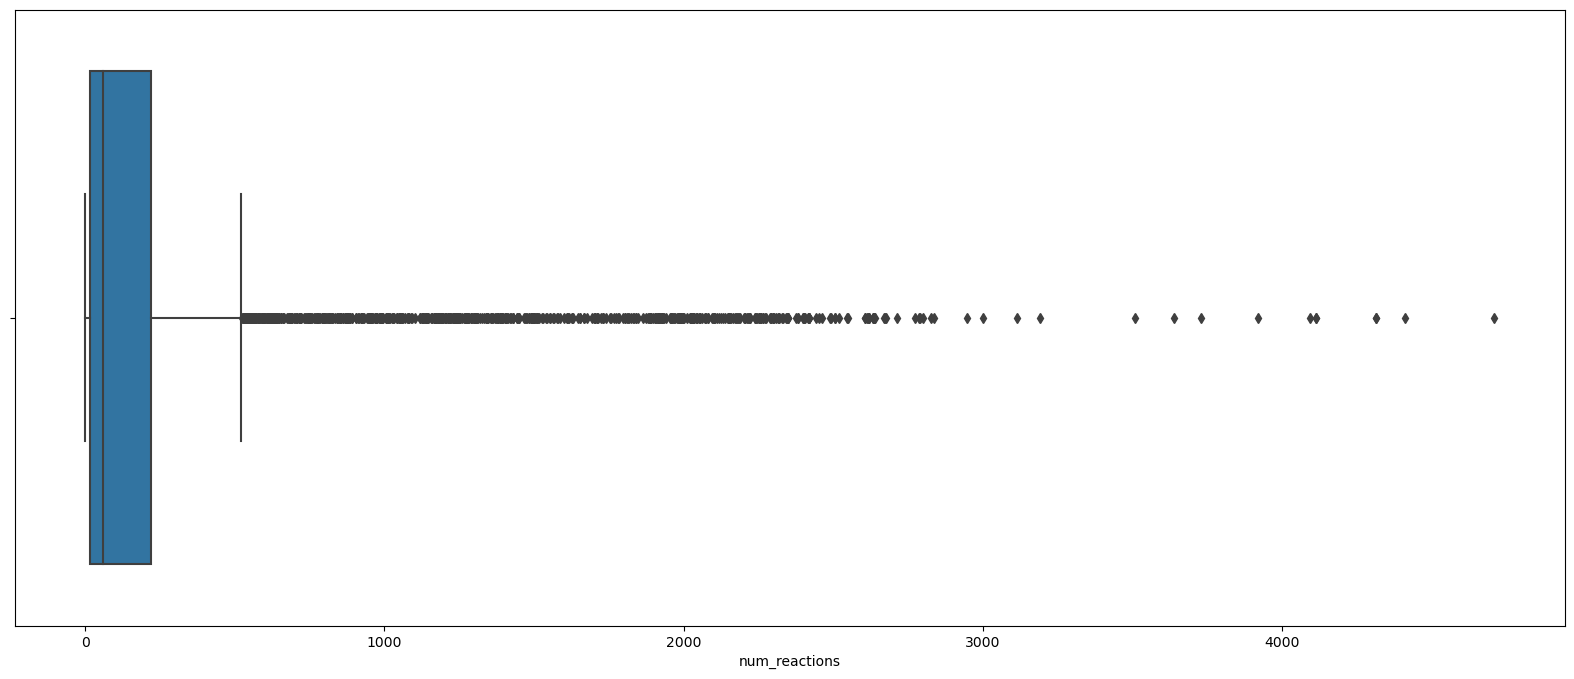

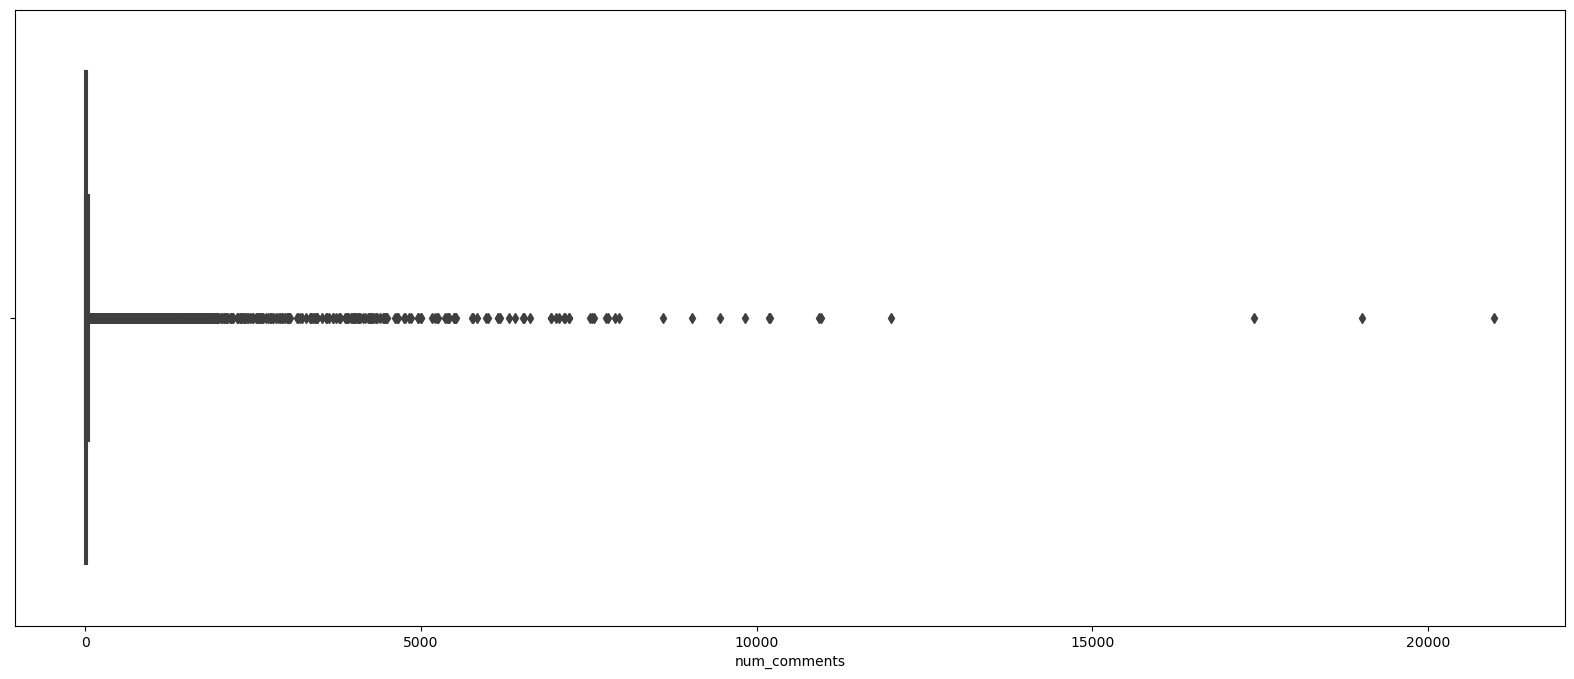

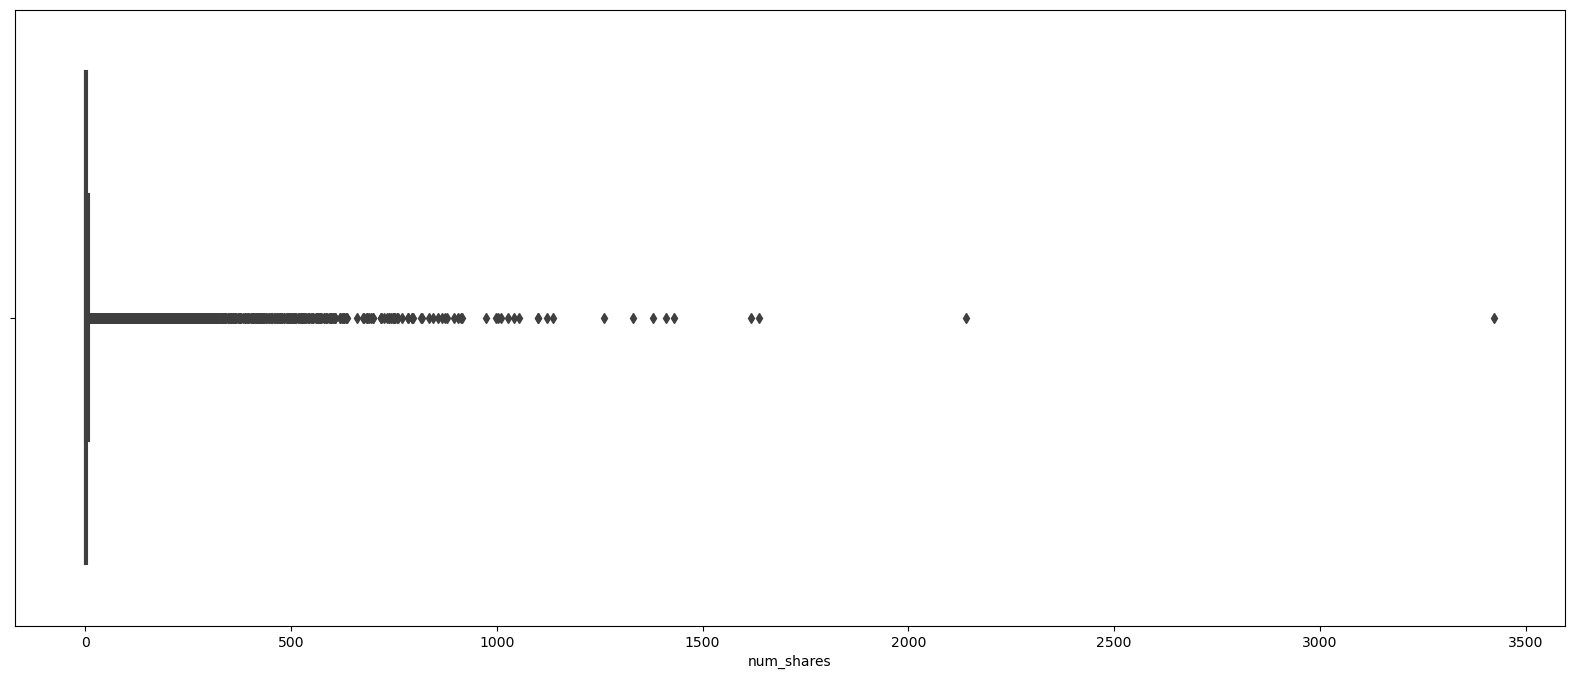

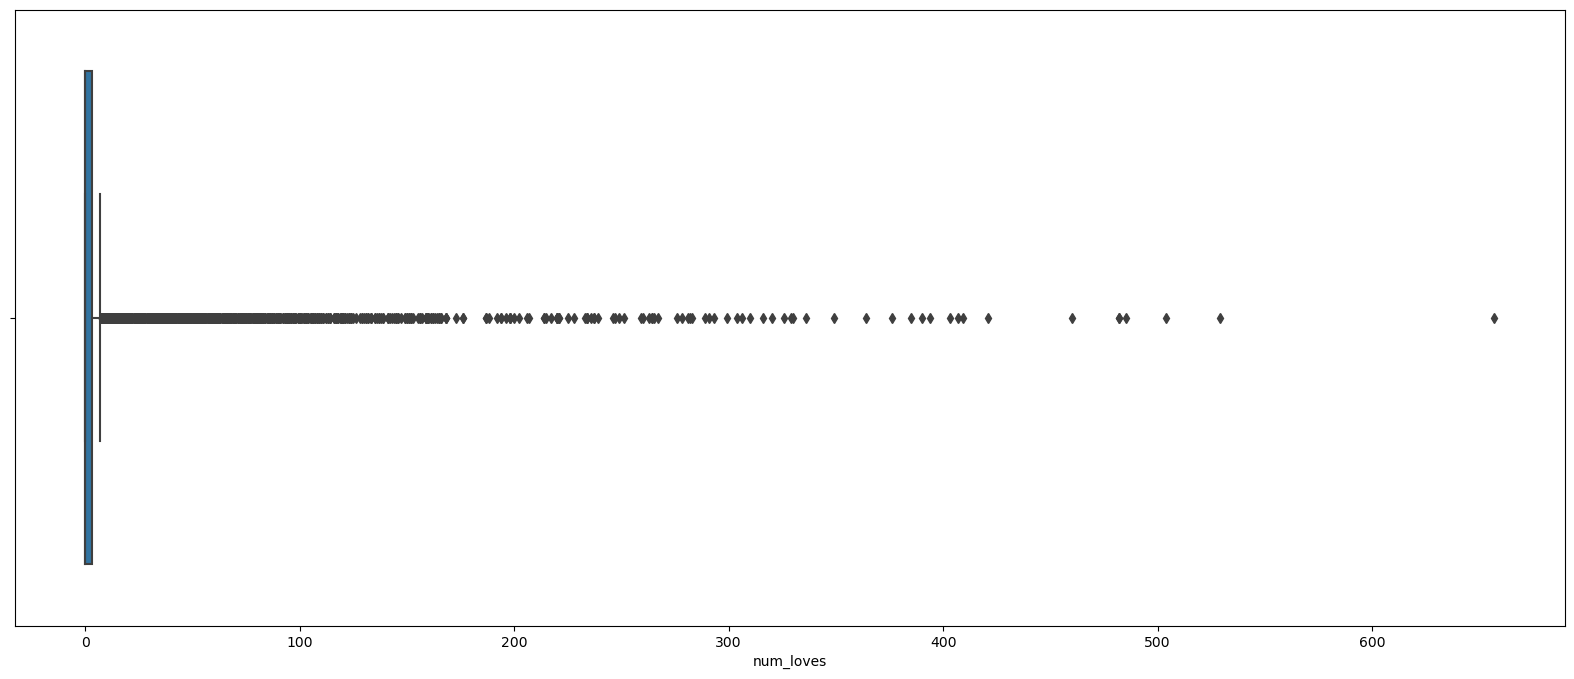

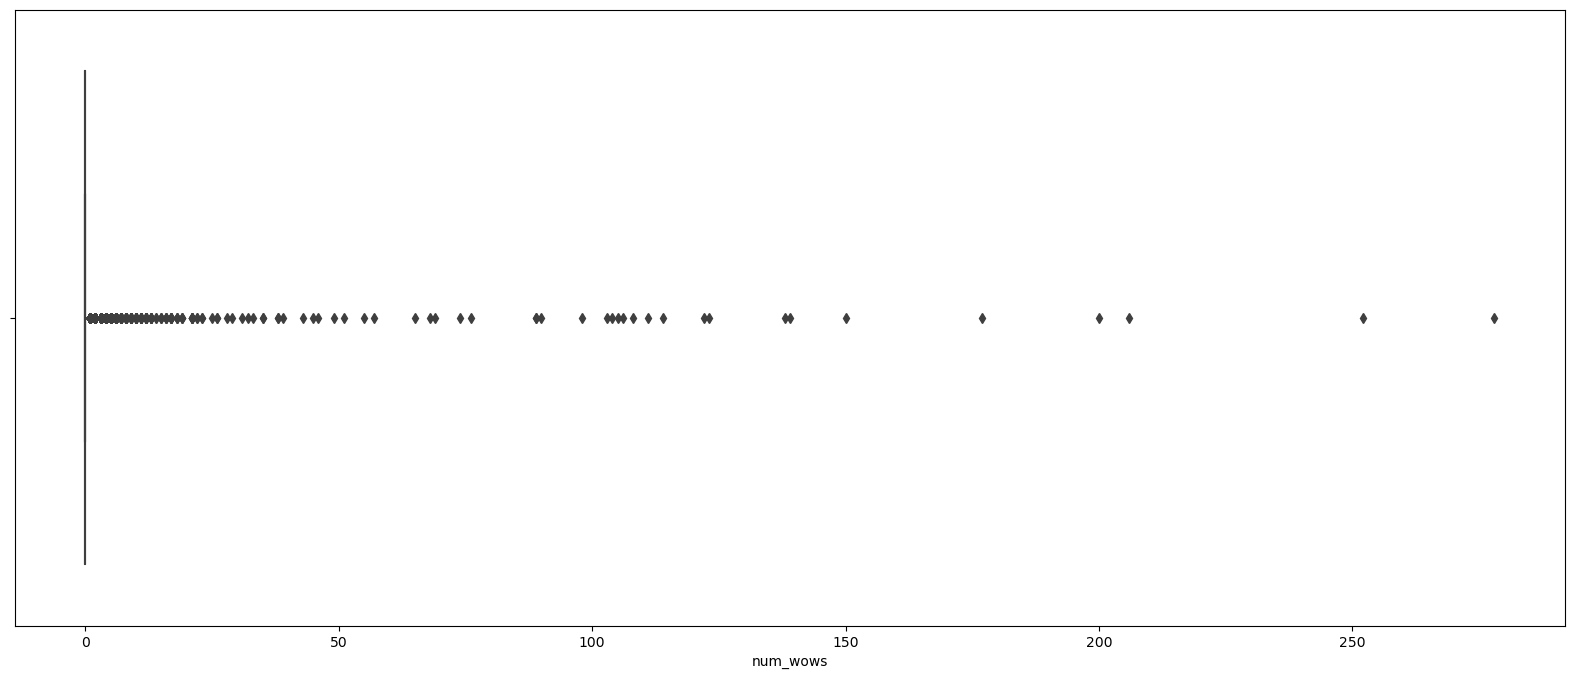

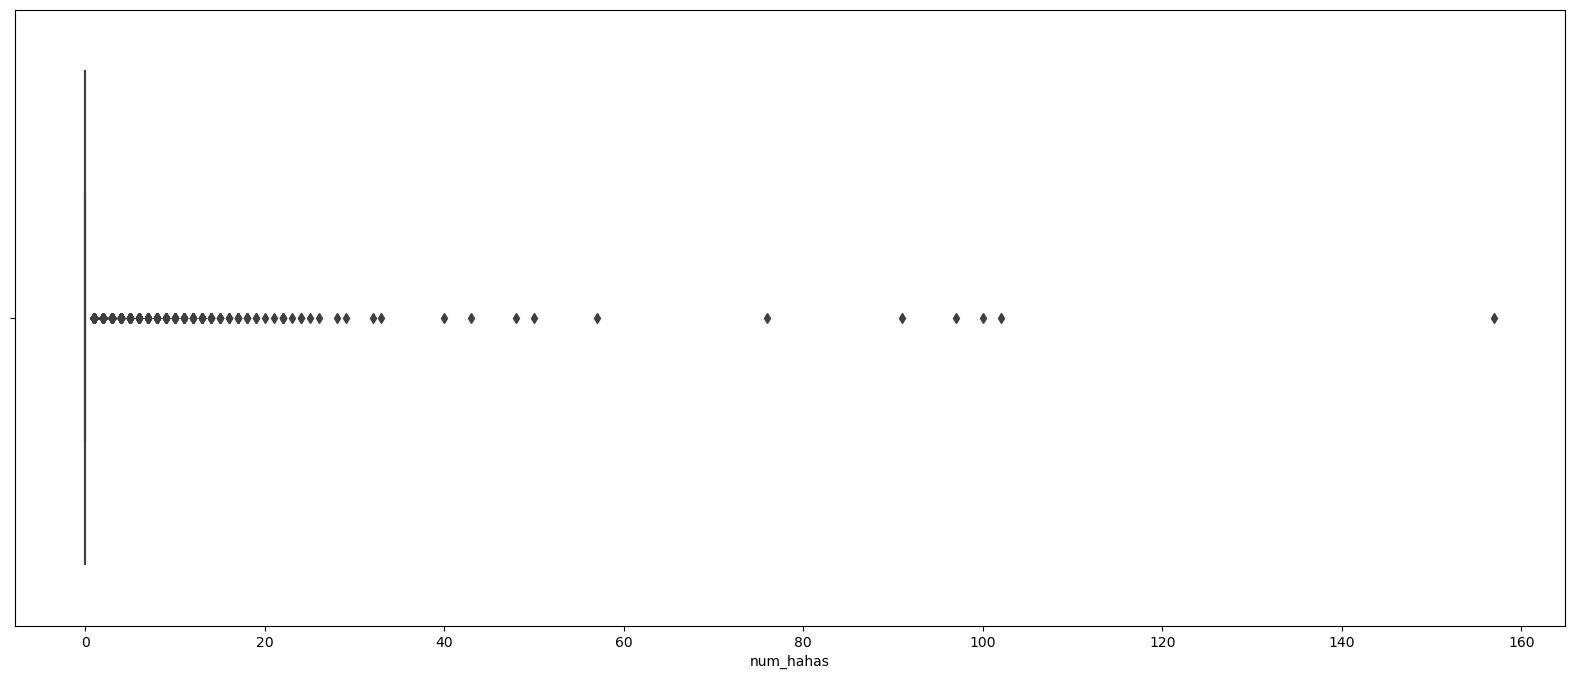

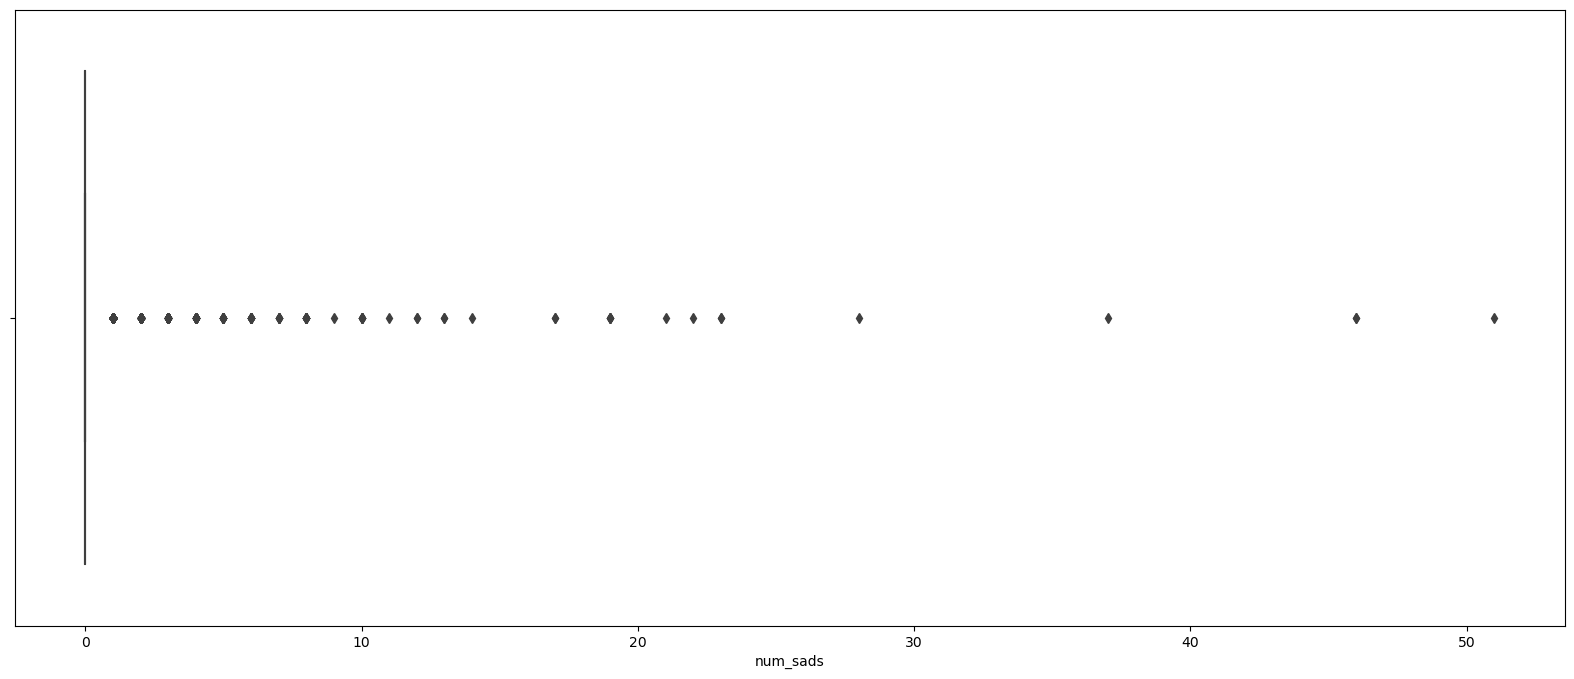

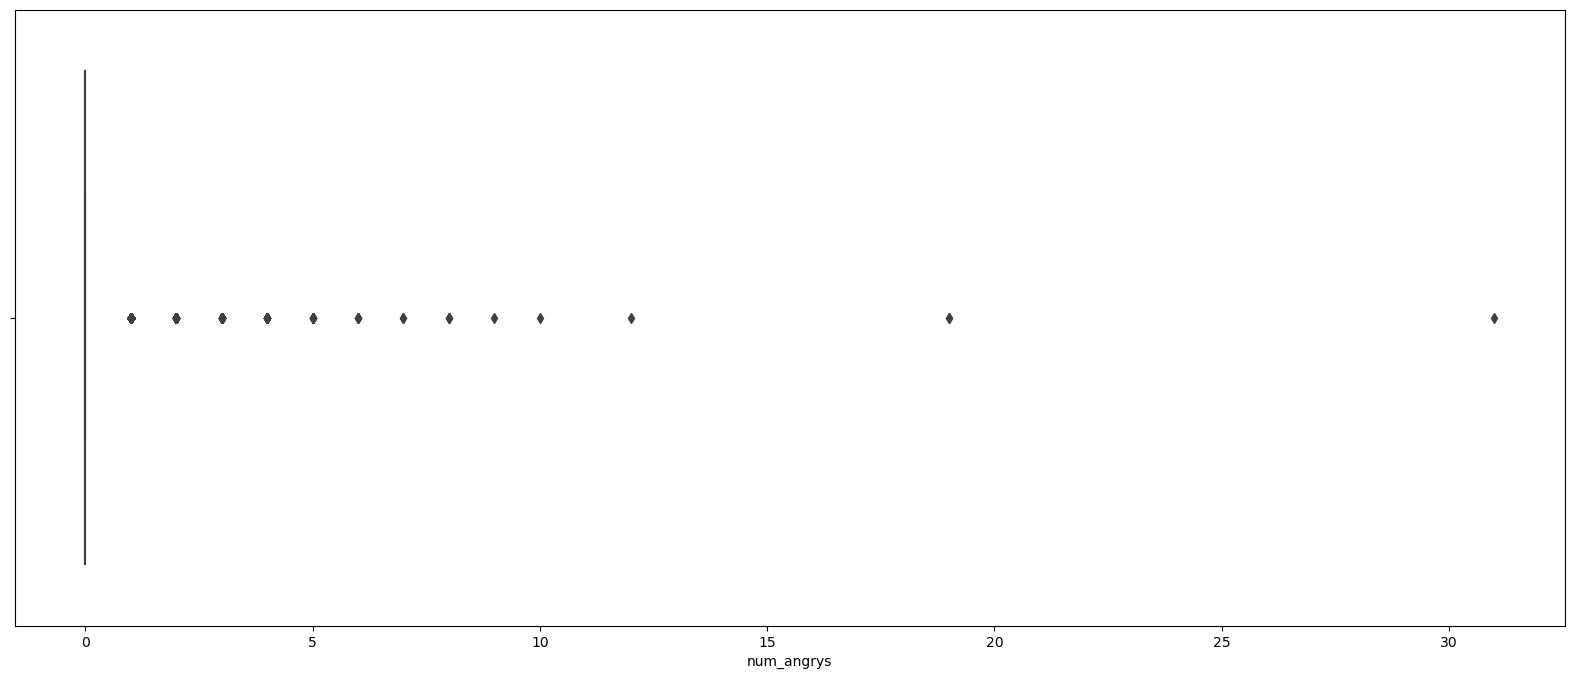

In [14]:
# I ll just plot a histogram for the other columns since they 
for columns in metadata_columns:
    if columns in ['num_likes','num_reaction']:
        pass
    else :
        fig = plt.figure(figsize=(20,8))
        sns.boxplot(x=columns,data=df)
        plt.show()

In [15]:
metadata_columns

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [16]:
# Do we game ,so here does the number of comments vary with the reactions?
# For example does a post with more wows have more comments or shares 
def post_insight(column1,column2,data=df):
    fig = plt.figure(figsize=(20,8))
    sns.jointplot(x=column1,y=column2,data=df)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f"Does {column1} really depend on {column2}")
    plt.show()

<Figure size 2000x800 with 0 Axes>

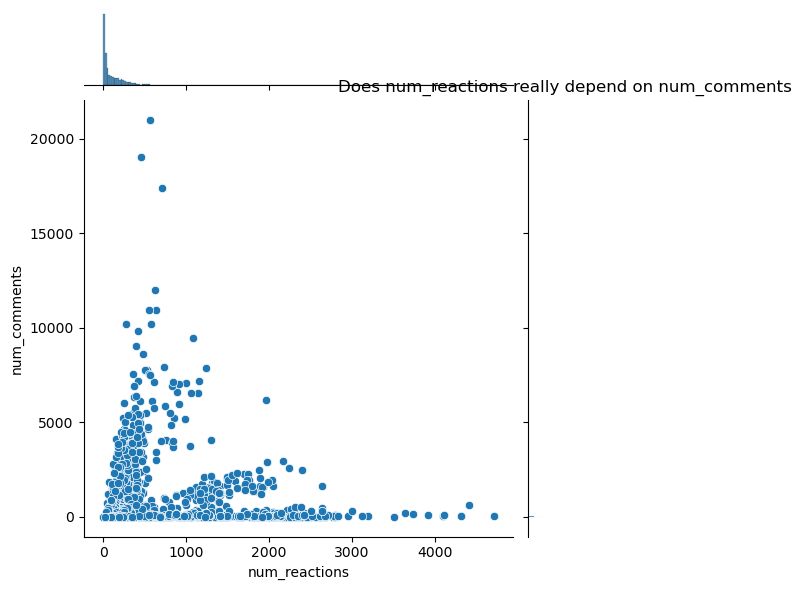

In [17]:
# reactions and comments
post_insight('num_reactions',"num_comments")
plt.show()

<Figure size 2000x800 with 0 Axes>

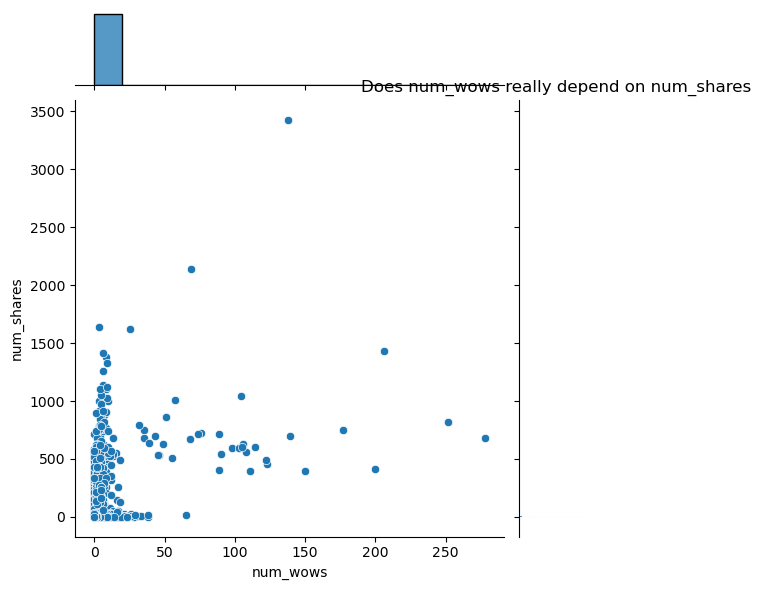

In [18]:
# do wows have more shares 
post_insight("num_wows","num_shares")

<Figure size 2000x800 with 0 Axes>

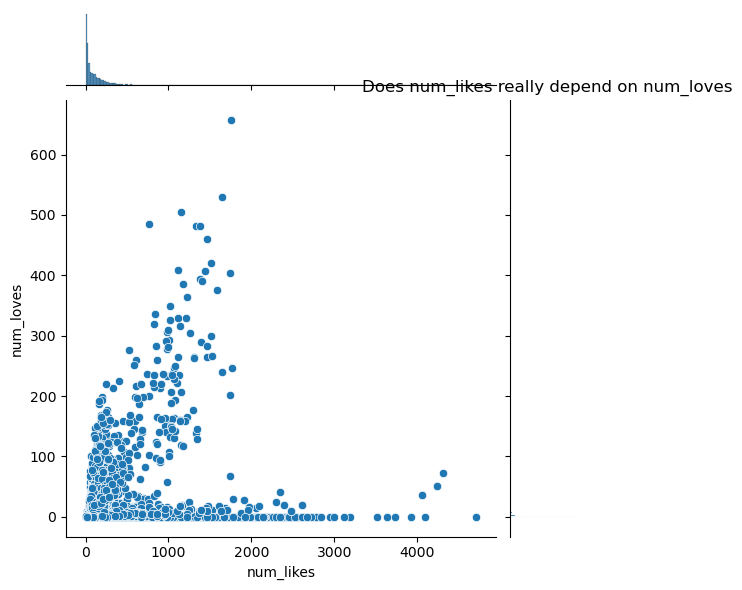

In [19]:
# loves and likes ,is there a relationship
post_insight("num_likes",'num_loves')

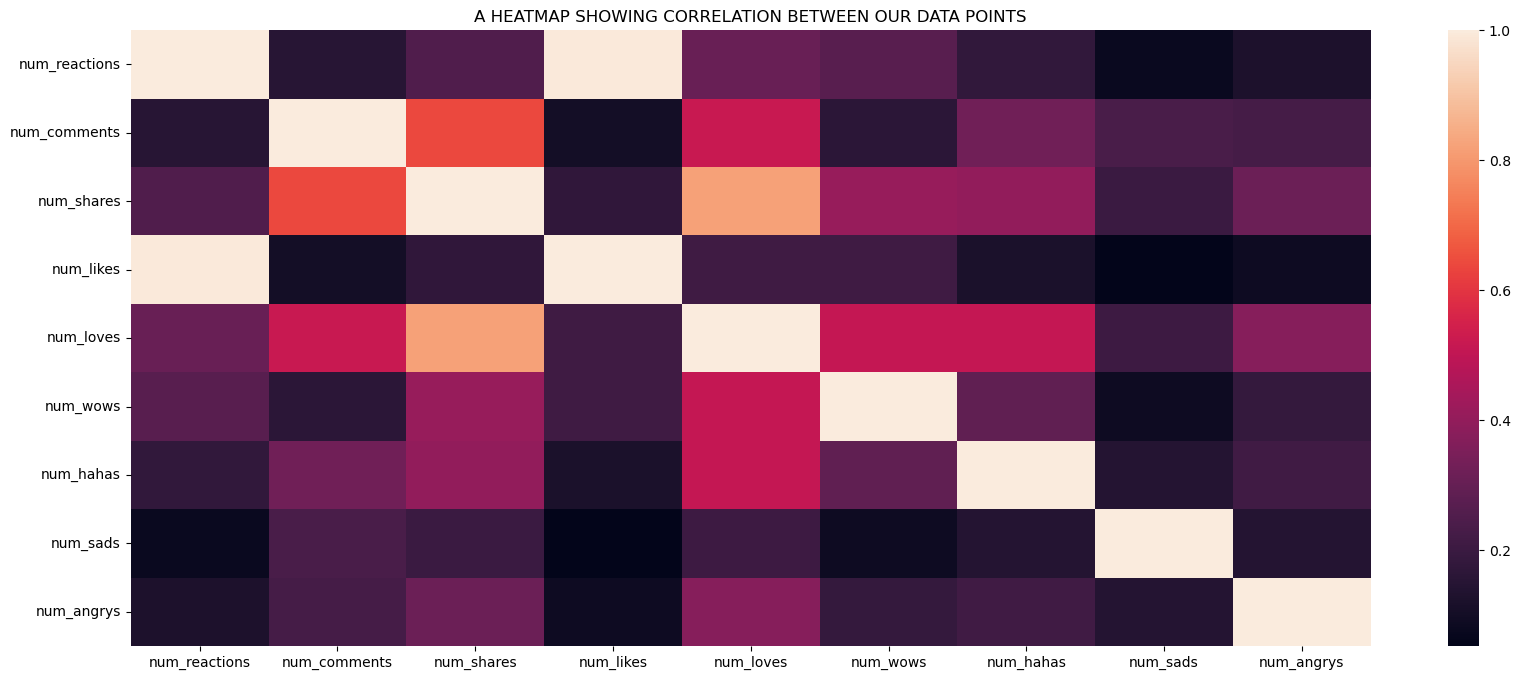

In [20]:
fig = plt.figure(figsize=(20,8))
plt.title("A HEATMAP SHOWING CORRELATION BETWEEN OUR DATA POINTS")
sns.heatmap(metadata_columns.corr())
plt.show()

# DATA PREPROCESSING 

In [21]:
scaler = StandardScaler()
metadata_columns = scaler.fit_transform(metadata_columns)
metadata_columns

array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [34]:
metadata_df = pd.DataFrame(metadata_columns)

In [35]:
metadata_df.columns = 

ValueError: Index data must be 1-dimensional

# CLUSTERING 

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(metadata_columns)

KMeans(n_clusters=3)

In [27]:
kmeans.cluster_centers_

array([[-0.25132849, -0.13279108, -0.13915302, -0.24418884, -0.13169885,
        -0.08482994, -0.0901906 , -0.05942104, -0.08141775],
       [ 1.20355309,  3.3651991 ,  3.55859537,  0.87052666,  3.41794709,
         1.81112129,  2.28734426,  1.57450635,  2.11233342],
       [ 3.44405643, -0.18325934, -0.21564903,  3.56552625, -0.24077535,
         0.13145062, -0.12573702, -0.13238837, -0.14835034]])

In [28]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

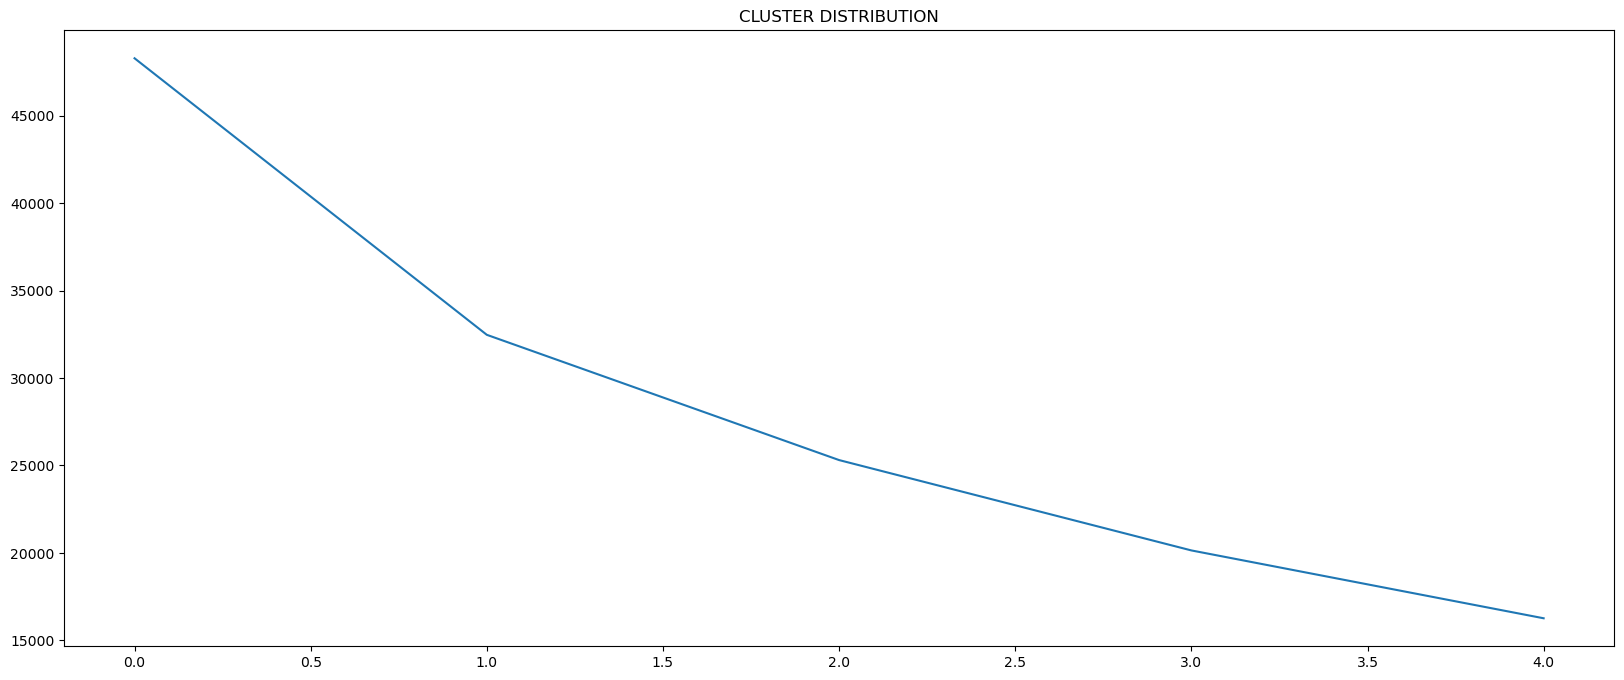

In [31]:
# Do some visualization for our clusters
ssd =[]
range_n_clusters = [2,4,6,8,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(metadata_columns)
    ssd.append(kmeans.inertia_)
fig = plt.figure(figsize=(20,8))
plt.plot(ssd)
plt.title("CLUSTER DISTRIBUTION")
plt.show() # The maximum clusters that we can fit are 4 

# VISUALIZING OUR CLUSTERS USING A BOXPLOT 

In [36]:
df1 = df.copy()

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(metadata_columns)
df1['Cluster_ID'] = kmeans.labels_

In [39]:
df1.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Cluster_ID'],
      dtype='object')

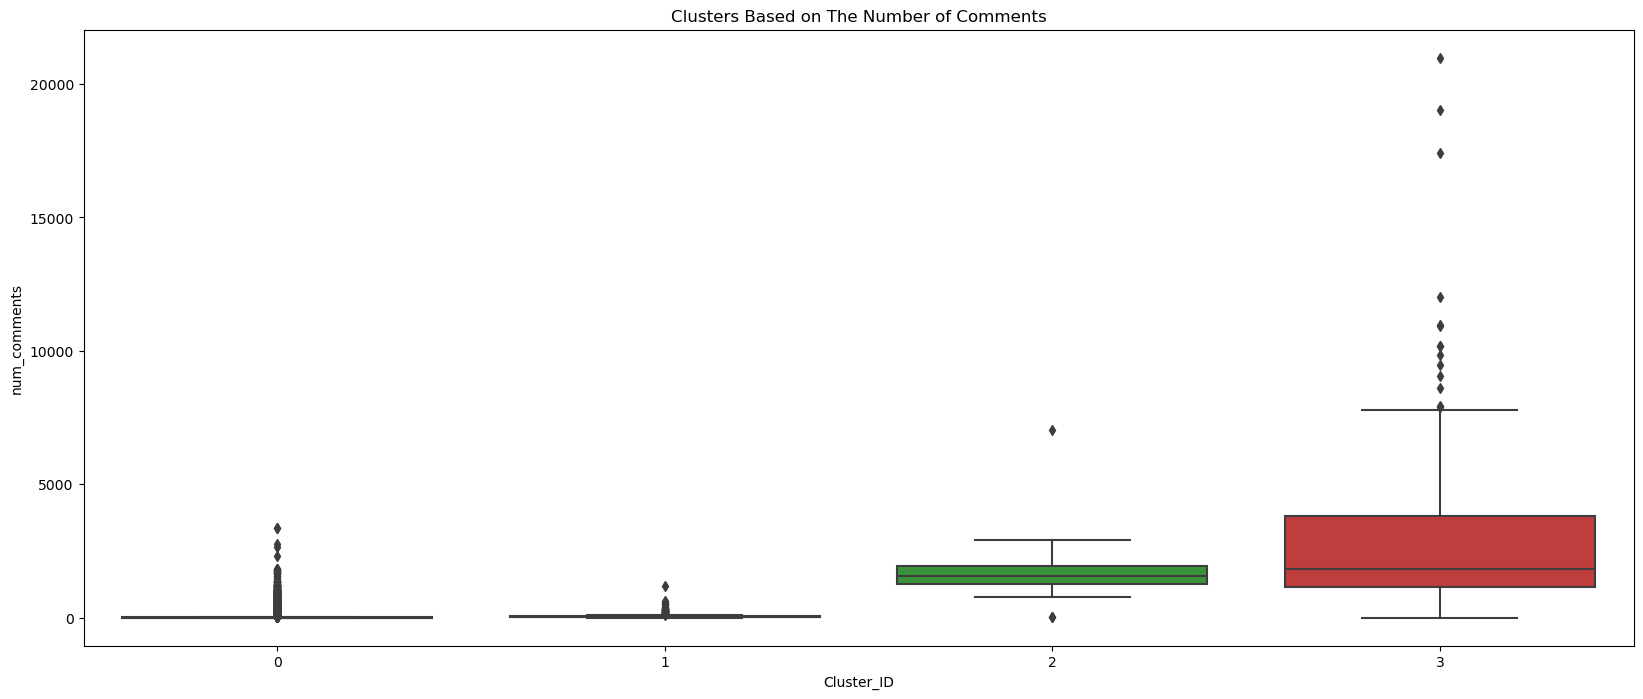

In [43]:
fig =plt.figure(figsize=(20,8))
sns.boxplot(x='Cluster_ID',y='num_comments',data=df1)
plt.title("Clusters Based on The Number of Comments")
plt.show()

In [58]:
def draw_boxplot(column,hue=None,df=df1):
    fig =plt.figure(figsize=(20,8))
    sns.boxplot(x='Cluster_ID',y=column,hue=hue,data=df)
    plt.title(f"Clusters Based on {column}")
    plt.show()

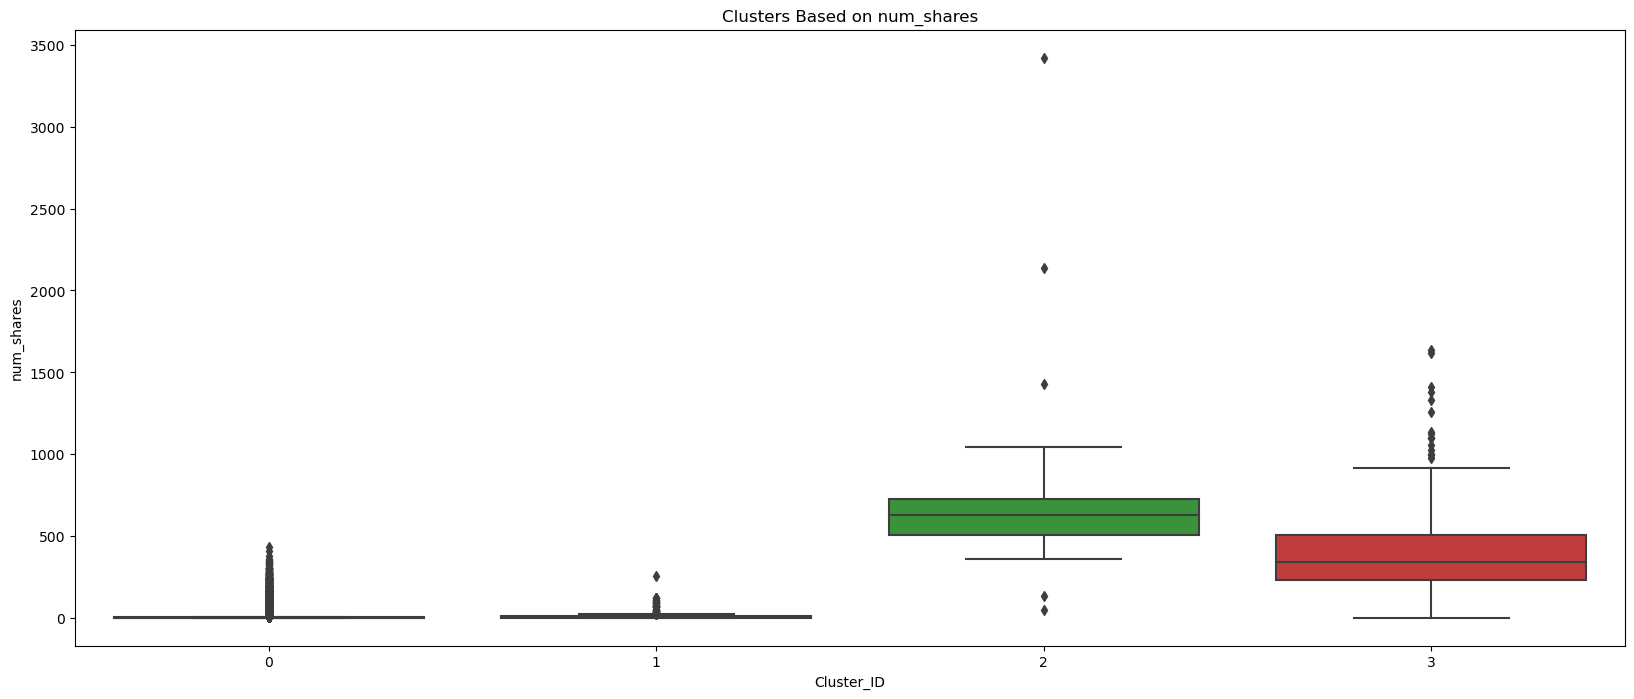

In [59]:
draw_boxplot('num_shares')

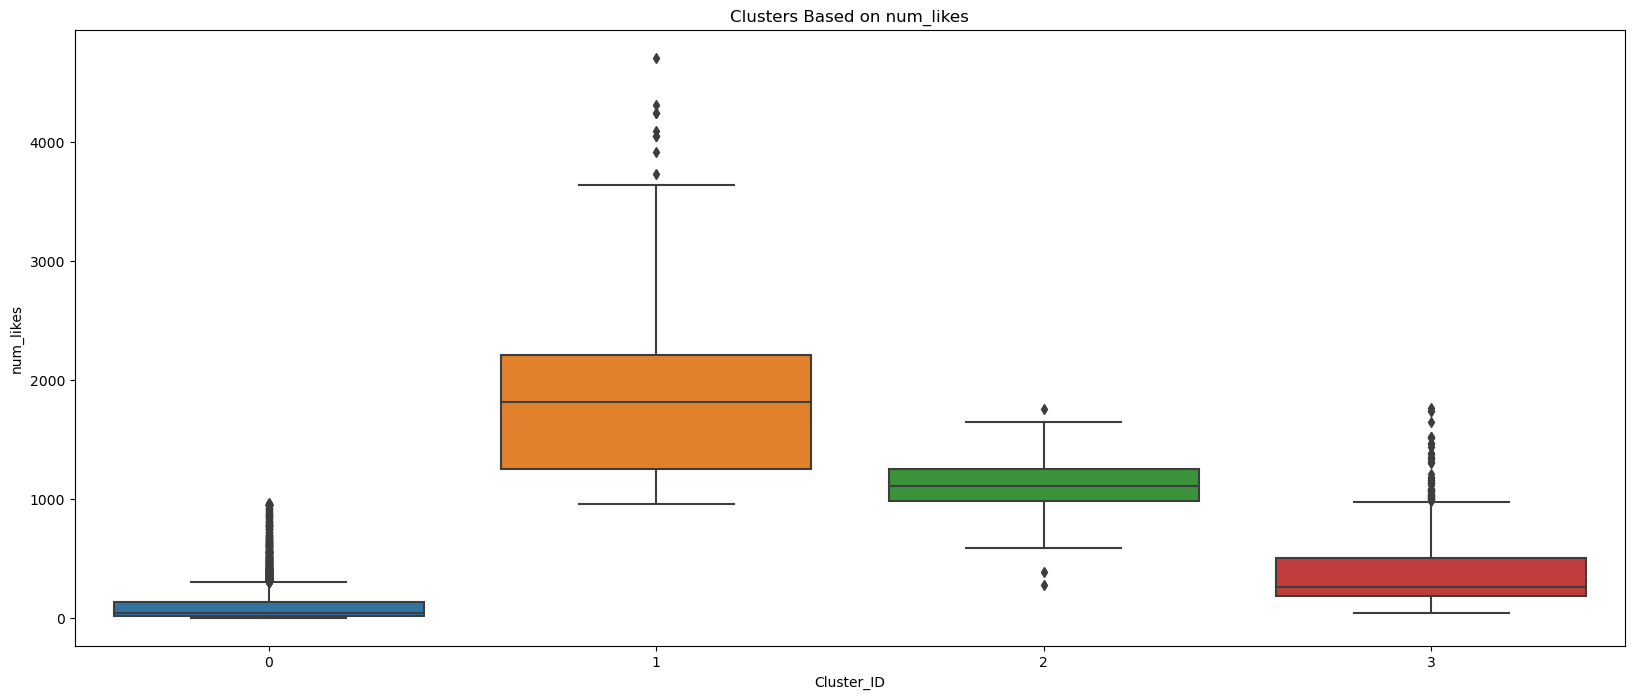

In [60]:
draw_boxplot("num_likes")

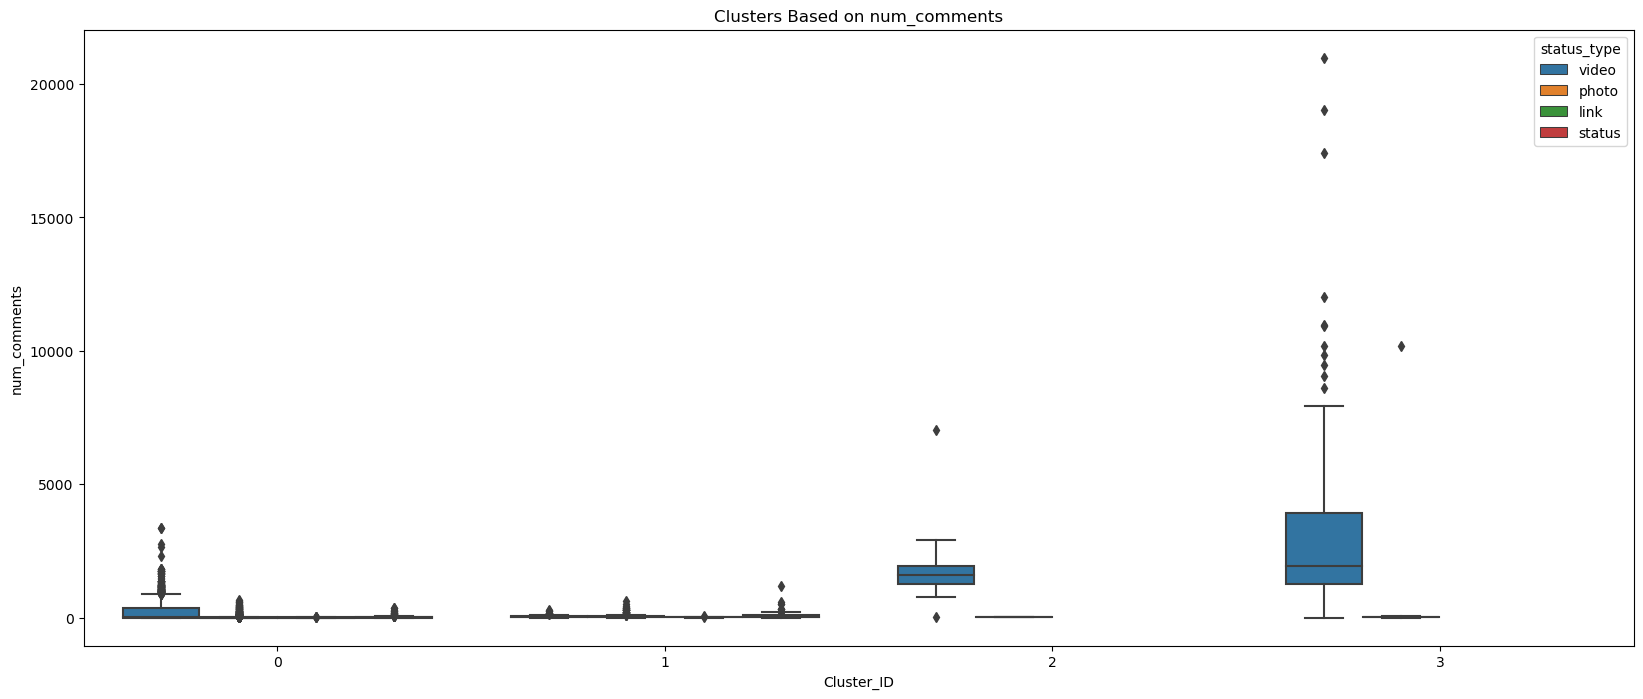

In [61]:
draw_boxplot('num_comments',hue='status_type')

In [62]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [64]:
df1['Cluster_ID'].value_counts().head()

0    6264
3     380
1     372
2      34
Name: Cluster_ID, dtype: int64

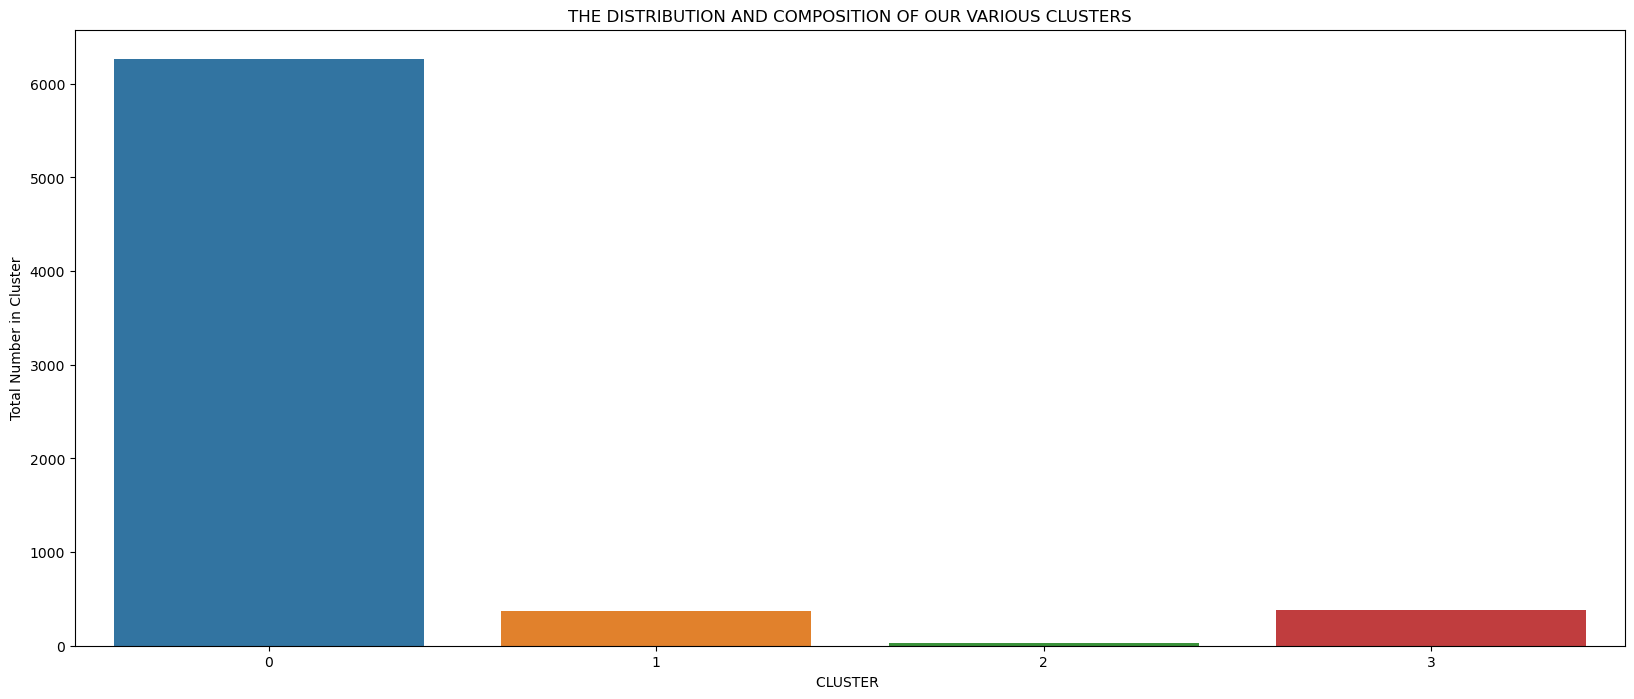

In [66]:
# THE DISTRIBUTION OF THE VARIOUS CLUSTERS
fig = plt.figure(figsize=(20,8))
sns.countplot(x='Cluster_ID',data=df1)
plt.title("THE DISTRIBUTION AND COMPOSITION OF OUR VARIOUS CLUSTERS")
plt.ylabel("Total Number in Cluster")
plt.xlabel("CLUSTER ")
plt.show()